<a href="https://colab.research.google.com/github/AbhiAadi/DeepLearning-MaterialDefect/blob/main/SNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
Dataset=pd.read_csv('/content/Materialdata.csv')
x_set=Dataset.iloc[:,1:-1].values
y_set=Dataset.iloc[:,-1].values


In [3]:
# Normalize the input features between -0.5 and +0.5
X_norm = MinMaxScaler(feature_range=(-0.5, 0.5))
Y_norm = MinMaxScaler(feature_range=(-0.99, 0.99))
y_set = y_set.reshape(-1,1)
# Normalize input and target variables

x_set[:,:] = X_norm.fit_transform(x_set[:,:])
y_set = Y_norm.fit_transform(y_set)

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x_set, y_set, test_size=1/3, random_state=42)


In [5]:
input_shape=(21,)
Output_shape = 1

# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, activation='tanh', input_shape=input_shape),
    tf.keras.layers.Dense(Output_shape , activation='linear')
])


optimizer = tf.keras.optimizers.Adam(lr=0.005)

# Compile the model
model.compile(optimizer=optimizer,
              loss='mse',
              metrics=['mae'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                440       
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=1000, batch_size=32)



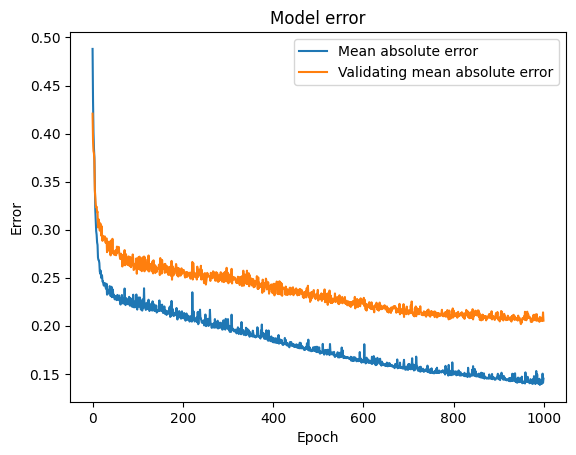

In [7]:
plt.plot(history.history['mae'], label='Mean absolute error')
plt.plot(history.history['val_mae'], label='Validating mean absolute error')
plt.title('Model error')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.show()

6/6 [==============================] - 0s 2ms/step


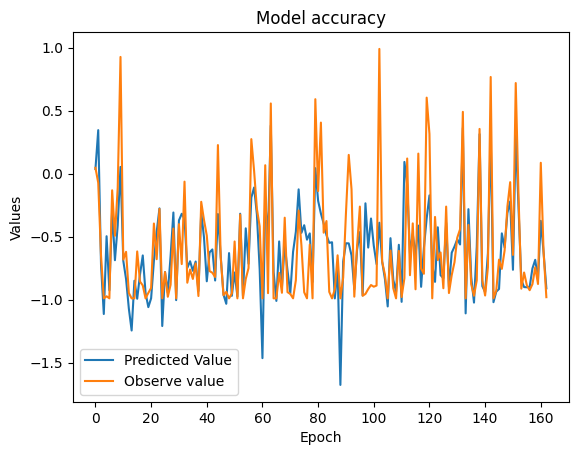

In [8]:
# Plot the training and validation loss
plt.plot(model.predict([x_test]), label='Predicted Value')
plt.plot(y_test, label='Observe value')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Values')
plt.legend()
plt.show()

SNN with PCA applied that reduce the feature from 21 to 15 and then the model is trained..

In [9]:
Dataset=pd.read_csv('/content/Materialdata.csv')
x_set=Dataset.iloc[:,1:-1].values
y_set=Dataset.iloc[:,-1].values

In [10]:
# Define the number of components to keep after PCA
n_components = 15

# Create a PCA object with the specified number of components
pca = PCA(n_components=n_components)

# Fit the PCA model to the input data and transform the data
X_pca = pca.fit_transform(x_set)
# print(pca.explained_variance_ratio_)

# # Print the total variance explained by the selected number of components
# print('Total variance explained:', sum(pca.explained_variance_ratio_))

X_norm = MinMaxScaler(feature_range=(-0.5, 0.5))
Y_norm = MinMaxScaler(feature_range=(-0.99, 0.99))
y_set = y_set.reshape(-1,1)
# Normalize input and target variables

X_pca[:,:] = X_norm.fit_transform(X_pca[:,:])
y_scaled = Y_norm.fit_transform(y_set)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_pca, y_scaled, test_size=1/3, random_state=42)

input_shape=(15,)
Output_shape = 1

# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, activation='tanh', input_shape=input_shape),
    tf.keras.layers.Dense(Output_shape , activation='linear')
])

optimizer = tf.keras.optimizers.Adam(lr=0.005)

# Compile the model
model.compile(optimizer=optimizer,
              loss='mse',
              metrics=['mean_absolute_error'])

# Print the model summary
model.summary()

history=model.fit(x_train, y_train, validation_data=(x_train, y_train), epochs=1000, batch_size=32)



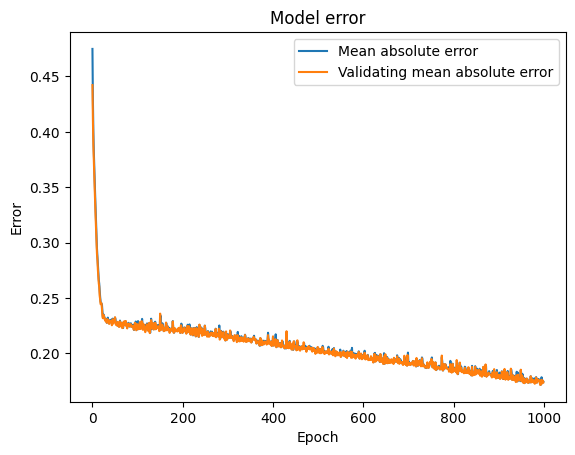

In [12]:
# Plot the training and validation loss
plt.plot(history.history['mean_absolute_error'], label='Mean absolute error')
plt.plot(history.history['val_mean_absolute_error'], label='Validating mean absolute error')
plt.title('Model error')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.show()

6/6 [==============================] - 0s 2ms/step


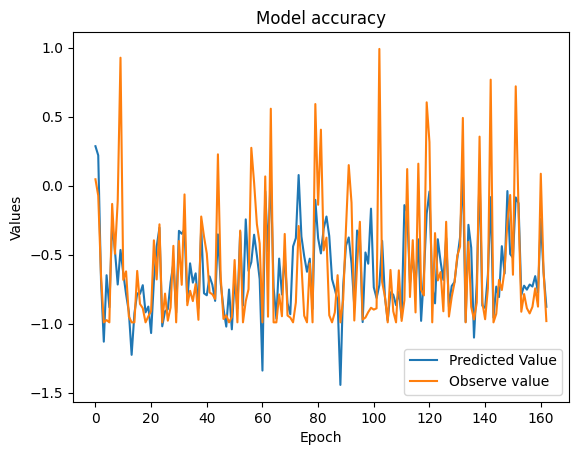

In [13]:
plt.plot(model.predict([x_test]), label='Predicted Value')
plt.plot(y_test, label='Observe value')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Values')
plt.legend()
plt.show()